In [89]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


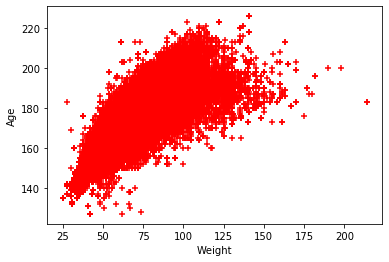

In [91]:
#%matplotlib inline
plt.xlabel('Weight')
plt.ylabel('Age')
plt.scatter(df.Weight,df.Height,color='red',marker='+')

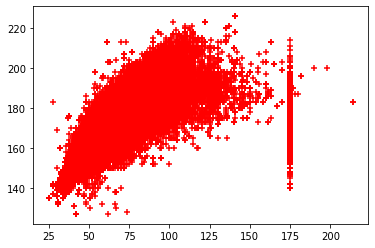

In [92]:
import math
df.fillna(175,inplace=True)
D = df[df['Weight'] >= 40] 
D = df[df['Height'] >= 75] 
#df.dropna(axis='columns',how='all')
D.fillna(175,inplace=True)
plt.scatter(D.Weight,D.Height,color='red',marker='+')

In [93]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(D[["Weight"]],D.Height)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
reg.predict([[50]])


array([173.4577027])

In [95]:
reg.coef_

array([0.04023228])

In [96]:
reg.intercept_

171.446088538963

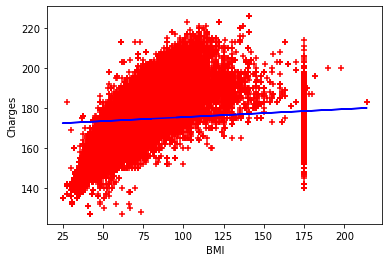

In [97]:
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.scatter(D.Weight,D.Height,color='red',marker='+')
plt.plot(D.Weight,reg.predict(D[["Weight"]]),color="blue")

In [98]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,175
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,175
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,175.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,175
3,4,Edgar Lindenau Aabye,M,34.0,175.0,175.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,175


In [99]:
dummies=pd.get_dummies(df.Event,df.Sex,df.Sport)
dummies

,"0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAeronautics Mixed Aeronautics","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Combined","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Downhill","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Giant Slalom","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Slalom","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Super G","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Women's Combined","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Women's Downhill","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Women's Giant Slalom","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Women's Slalom",...,"0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Super-Heavyweight, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n

In [100]:
merged=pd.concat([D,dummies],axis='columns')
merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,"0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Super-Heavyweight, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Unlimited Class, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Welterweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Welterweight, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Featherweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Flyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Heavyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Light-Heavyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Lightweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Middleweight, Freestyle"
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,0,0,0,0,0,0,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,0,0,0,0,0,0,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,175.0,Denmark,DEN,1920 Summer,1920,...,0,0,0,0,0,0,0,0,0,0
3,4,Edg

In [101]:
final=merged.drop(['Name','Sex','Sport','Season','Event','City','NOC'],axis='columns')
final

,ID,Age,Height,Weight,Team,Games,Year,Medal,"0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAeronautics Mixed Aeronautics","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectAlpine Skiing Men's Combined",...,"0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Super-Heavyweight, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Unlimited Class, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Welterweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Men's Welterweight, Greco-Roman","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Featherweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Flyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Heavyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Length: 271116, dtype: objectWrestling Women's Light-Heavyweight, Freestyle","0 M\n1 M\n2 M\n3 M\n4 F\n ..\n271111 M\n271112 M\n271113 M\n271114 M\n271115 M\nName: Sex, Length: 271116, dtype: object0 Basketball\n1 Judo\n2 Football\n3 Tug-Of-War\n4 Speed Skating\n ... \n271111 Luge\n271112 Ski Jumping\n271113 Ski Jumping\n271114 Bobsleigh\n271115 Bobsleigh\nName: Sport, Leng

In [102]:
x=final.drop(['Team','Games','Height','Medal'],axis='columns')

In [86]:
y=D.Height
y

0         180.0
1         170.0
4         185.0
5         185.0
6         185.0
          ...  
271111    179.0
271112    176.0
271113    176.0
271114    185.0
271115    185.0
Name: Height, Length: 205812, dtype: float64

In [88]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
model.score(x,y)